# 기계학습 
## 기계학습이란 


* 인간의 지능을 모방하려는 시도 
* 따로 열심히 프로그래밍 안하고, 컴퓨터가 알아서 해주면 좋겠다. 
![](./file_ml/ml_idea.jpg)
## 기계학습의 종류


* Supervised learning (지도학습)
 * 답안지가 있다. 
 * 예
   * 개체들의 유전형 : 병발생여부 
   * 농장 블럭의 토양 프로파일 : 각 블럭의 벼 수량 
 * 지도학습은 궁극적으로 입력값이 주어지면 추정된 답을 돌려주는 모델이 된다. 
 * Classification, Regression 이 해당됨
* Unsupervised learning (비지도학습)
 * 답안지가 없다.
 * 앞 예들에서 우측부분이 없음
 * 비지도 학습은 데이터들을 군집화 (Clustering) 한다. 
 * 군집을 기준으로 사람이 labeling을 하고 지도학습을 돌리는 Semi-supervised learning전략이 존재함.
* reinforcement learning (강화학습)
 * 게임과 같은 룰이 존재
 * 룰에 따라야 하는 Agent존재 
 * Agent는 sensor가 있음 
 * 시간에 따른 sensor 값을 받음 
 * Agent는 판단을 하고 움직임 
 * 게임룰에 따라 최고점을 내도록 훈련 
 * 자동항법,자동운전 등등 

## Supervised learning 

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [96]:
print diabetes.DESCR

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
R2 score: 0.47


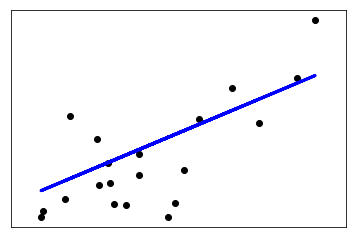

In [102]:
# Split the data into training/testing sets
diabetes_X       = diabetes.data[:,2:3]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

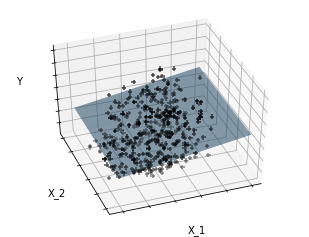

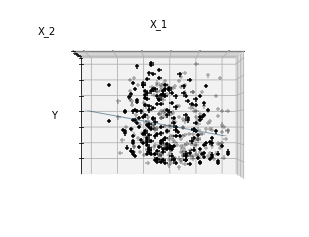

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
indices = (0, 1)

X_train = diabetes.data[:-20, indices]
X_test  = diabetes.data[-20:, indices]
y_train = diabetes.target[:-20]
y_test  = diabetes.target[-20:]

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)


# #############################################################################
# Plot the figure
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],
                                          [-.1, .15, -.1, .15]]).T
                                ).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

#Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)



elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

In [105]:
diabetes_X       = diabetes.data[:,0:9]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

('Coefficients: \n', array([   8.83280834, -233.13486283,  521.35514538,  340.31281306,
       -823.19966065,  501.00354195,  110.17654099,  199.19735852,
        762.01663114]))
Mean squared error: 1970.56
Variance score: 0.59


In [39]:
# Classification

%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

In [26]:
digits.images.shape

(1797, 8, 8)

In [24]:
a[:4//2]

[1, 2]

In [9]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [19]:
len(images_and_labels)

1797

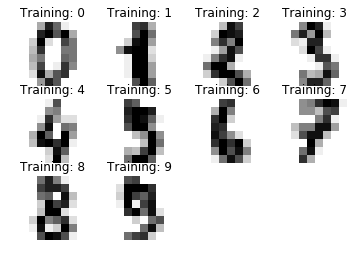

In [14]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [35]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data      = digits.images.reshape((n_samples, -1)) # 각 이미지 상자를 하나의 긴 array로 바꾸엇다. -1 값은 알아서 값을 채우라는뜻 이경우 64가 됨 

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

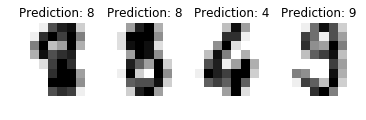

In [38]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
# 1797개의 샘플중 반만 훈련
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
# 나머지 반은 예측:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/26106935459abe7c266f7b1ebfa2a824b334c807)
* precision : 진짜라고 예측한것중 진짜진짜
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4c233366865312bc99c832d1475e152c5074891b)
* recall    : 진짜진짜중 진짜라고 예측한것
![](./file_ml/precision_recall.jpg)